## Connect to T4 GPU Runtime

In [1]:
from warnings import filterwarnings
filterwarnings('ignore')

In [2]:
import pandas as pd
df = pd.read_csv(r'https://raw.githubusercontent.com/sindhura-nk/Datasets/refs/heads/main/booking_train.csv')
df.head()

,id,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,0,2,0,0,2,1,0,0,9,2018,1,14,1,1,11,0,67.50,0,0
1,1,2,0,1,2,0,0,0,117,2018,7,29,0,0,0,0,72.25,0,0
2,2,2,0,0,1,0,0,0,315,2018,12,2,0,0,0,0,52.00,0,0
3,3,1,0,0,2,1,0,0,32,2018,12,1,1,0,0,0,56.00,0,0
4,4,2,0,1,0,0,0,0,258,2018,10,16,0,0,0,0,100.00,0,1


## Perform basic data quality checks

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42100 entries, 0 to 42099
Data columns (total 19 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   id                                    42100 non-null  int64  
 1   no_of_adults                          42100 non-null  int64  
 2   no_of_children                        42100 non-null  int64  
 3   no_of_weekend_nights                  42100 non-null  int64  
 4   no_of_week_nights                     42100 non-null  int64  
 5   type_of_meal_plan                     42100 non-null  int64  
 6   required_car_parking_space            42100 non-null  int64  
 7   room_type_reserved                    42100 non-null  int64  
 8   lead_time                             42100 non-null  int64  
 9   arrival_year                          42100 non-null  int64  
 10  arrival_month                         42100 non-null  int64  
 11  arrival_date   

In [4]:
df.isna().sum()

,0
id,0
no_of_adults,0
no_of_children,0
no_of_weekend_nights,0
no_of_week_nights,0
type_of_meal_plan,0
required_car_parking_space,0
room_type_reserved,0
lead_time,0
arrival_year,0


In [5]:
df.duplicated().sum()

np.int64(0)

# Separate X and Y features

In [6]:
df.columns

Index(['id', 'no_of_adults', 'no_of_children', 'no_of_weekend_nights',
       'no_of_week_nights', 'type_of_meal_plan', 'required_car_parking_space',
       'room_type_reserved', 'lead_time', 'arrival_year', 'arrival_month',
       'arrival_date', 'market_segment_type', 'repeated_guest',
       'no_of_previous_cancellations', 'no_of_previous_bookings_not_canceled',
       'avg_price_per_room', 'no_of_special_requests', 'booking_status'],
      dtype='object')

In [7]:
X = df.drop(columns=['id','booking_status'])
Y = df[['booking_status']]

In [8]:
X.head()

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests
0,2,0,0,2,1,0,0,9,2018,1,14,1,1,11,0,67.50,0
1,2,0,1,2,0,0,0,117,2018,7,29,0,0,0,0,72.25,0
2,2,0,0,1,0,0,0,315,2018,12,2,0,0,0,0,52.00,0
3,1,0,0,2,1,0,0,32,2018,12,1,1,0,0,0,56.00,0
4,2,0,1,0,0,0,0,258,2018,10,16,0,0,0,0,100.00,0


In [9]:
Y.head()

,booking_status
0,0
1,0
2,0
3,0
4,1


# Data cleaning and data preprocessing

In [10]:
from sklearn.pipeline import make_pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler

In [11]:
num_pipe =make_pipeline(
    SimpleImputer(strategy='median'),
    StandardScaler()
).set_output(transform='pandas')

In [12]:
X_pre = num_pipe.fit_transform(X)
X_pre

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests
0,0.151040,-0.313454,-0.998814,-0.278849,1.294624,-0.160945,-0.515173,-1.170469,0.409661,-2.330398,-0.214091,0.428551,5.766758,33.699120,-0.101479,-0.998052,-0.737691
1,0.151040,-0.313454,0.130259,-0.278849,-0.407020,-0.160945,-0.515173,0.161740,0.409661,-0.209778,1.473487,-1.149928,-0.173408,-0.060506,-0.101479,-0.870153,-0.737691
2,0.151040,-0.313454,-0.998814,-0.979466,-0.407020,-0.160945,-0.515173,2.604122,0.409661,1.557404,-1.564154,-1.149928,-0.173408,-0.060506,-0.101479,-1.415406,-0.737691
3,-1.753925,-0.313454,-0.998814,-0.278849,1.294624,-0.160945,-0.515173,-0.886758,0.409661,1.557404,-1.676659,0.428551,-0.173408,-0.060506,-0.101479,-1.307702,-0.737691
4,0.151040,-0.313454,0.130259,-1.680084,-0.407020,-0.160945,-0.515173,1.901012,0.409661,0.850531,0.010919,-1.149928,-0.173408,-0.060506,-0.101479,-0.122955,-0.737691
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
42095,2.056005,-0.313454,-0.998814,1.122386,-0.407020,-0.160945,0.685890,0.692156,0.409661,1.557404,1.585992,0.428551,-0.173408,-0.060506,-0.101479,0.954088,1.842849
42096,0.151040,-0.313454,-0.998814,0.421768,-0.407020,-0.160945,-0.515173,-0.862087,-2.441040,0.497095,0.798456,-1.149928,-0.173408,-0.060506,-0.101479,3.233919,-0.737691
42097,0.151040,-0.313454,-0.998814,-0.278849,2.996268,-0.160945,-0.515173,2.320411,0.409661,-0.209778,0.573445,-1.149928,-0.173408,-0.060506,-0.101479,-0.230659,-0.737691
42098,-1.753925,-0.313454,-0.998814,0.421768,-0.407020,-0.160945,-0.515173,-1.219810,0.409661,1.203968,-0.776617,-1.149928,-0.173408,-0.060506,-0.101479,0.415567,-0.737691


## Split the data into training and testing

In [13]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest = train_test_split(X_pre,Y,train_size=0.80,random_state=42)
print(xtrain.shape,xtest.shape,ytrain.shape,ytest.shape,sep='\t')

(33680, 17)	(8420, 17)	(33680, 1)	(8420, 1)


## Build Neural Network model

In [14]:
from keras.models import Sequential
from keras.layers import Input,Dense, Dropout

In [15]:
xtrain.shape

(33680, 17)

In [16]:
xtrain.shape

(33680, 17)

In [17]:
model = Sequential()

## Add the input layer
model.add(Input(shape=(xtrain.shape[1],)))

## Add the hidden layer1
model.add(Dense(units=64,activation='relu'))

## Add the dropout layer
model.add(Dropout(rate=0.4))

## Add the hidden layer2
model.add(Dense(units=32,activation='relu'))

## Add another dropout layer2
model.add(Dropout(rate=0.2))

# Add the output layer
model.add(Dense(units=1,activation='sigmoid'))


In [18]:
model.summary()


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 64)             │         1,152 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,265 (12.75 KB)

 Trainable params: 3,265 (12.75 KB)

 Non-trainable params: 0 (0.00 B)

In [19]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])


In [20]:
nn = model.fit(xtrain,ytrain,validation_split=0.25,epochs=20)

Epoch 1/20
790/790 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - accuracy: 0.7012 - loss: 0.5572 - val_accuracy: 0.7743 - val_loss: 0.4763
Epoch 2/20
790/790 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.7620 - loss: 0.4926 - val_accuracy: 0.7783 - val_loss: 0.4690
Epoch 3/20
790/790 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.7770 - loss: 0.4783 - val_accuracy: 0.7816 - val_loss: 0.4649
Epoch 4/20
790/790 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.7726 - loss: 0.4763 - val_accuracy: 0.7827 - val_loss: 0.4636
Epoch 5/20
790/790 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.7747 - loss: 0.4742 - val_accuracy: 0.7869 - val_loss: 0.4598
Epoch 6/20
790/790 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.7833 - loss: 0.4645 - val_accuracy: 0.7886 - val_loss: 0.4579
Epoch 7/20
790/790 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.7833 - loss: 0.4681 - val_accuracy: 0.7913 - val_loss: 0.4571
Epoch 8/20
790/790 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.7792 - loss: 0.4765 - val_accuracy: 0.

## plot the learning curve

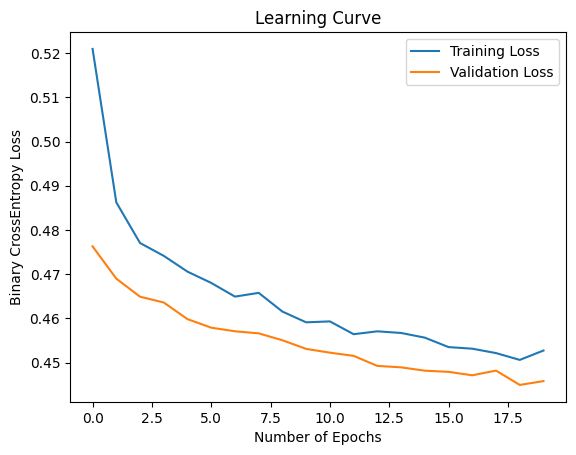

In [21]:
import matplotlib.pyplot as plt
plt.plot(nn.history['loss'],label='Training Loss')
plt.plot(nn.history['val_loss'],label='Validation Loss')
plt.legend()
plt.title('Learning Curve')
plt.xlabel('Number of Epochs')
plt.ylabel('Binary CrossEntropy Loss')
plt.show()

## Evaluating the model

In [22]:
model.evaluate(xtrain,ytrain)

1053/1053 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8033 - loss: 0.4374


[0.4379512369632721, 0.8030878901481628]

In [23]:
model.evaluate(xtest,ytest)

264/264 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8006 - loss: 0.4428


[0.4395727515220642, 0.7989311218261719]

In [24]:
from sklearn.metrics import accuracy_score
ypred_test = model.predict(xtest)
ypred_test

264/264 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


array([[0.08653117],
       [0.92317086],
       [0.43477663],
       ...,
       [0.78251034],
       [0.7756903 ],
       [0.42092624]], dtype=float32)

In [25]:
ypreds_test_final =[]
for i in ypred_test:
  if i>0.5:
    ypreds_test_final.append(1)
  else:
    ypreds_test_final.append(0)
#ypreds_test_final
ac_sc = accuracy_score(ytest,ypreds_test_final)
ac_sc

0.7989311163895487

## Save the models

In [26]:
model.save('TrainBooking.keras')

## Load the models

In [27]:
from keras.models import load_model
m = load_model('/content/TrainBooking.keras')
m.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 64)             │         1,152 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 9,797 (38.27 KB)

 Trainable params: 3,265 (12.75 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 6,532 (25.52 KB)

## Perform out of sample predictions

In [28]:
xnew = pd.read_csv(r'https://raw.githubusercontent.com/sindhura-nk/Datasets/refs/heads/main/booking_test.csv')
xnew.head()

,id,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests
0,42100,3,0,1,4,0,0,1,111,2018,12,5,1,0,0,0,115.60,2
1,42101,2,0,0,3,0,0,0,22,2017,10,21,0,0,0,0,85.00,0
2,42102,2,2,0,1,0,0,3,18,2018,8,10,1,0,0,0,240.00,1
3,42103,2,0,0,3,0,0,0,88,2018,5,30,0,0,0,0,80.75,0
4,42104,1,0,0,2,2,0,0,7,2018,9,21,1,0,0,0,144.00,0


In [29]:
xnew2 = xnew.drop(columns='id')
xnew2.head()

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests
0,3,0,1,4,0,0,1,111,2018,12,5,1,0,0,0,115.60,2
1,2,0,0,3,0,0,0,22,2017,10,21,0,0,0,0,85.00,0
2,2,2,0,1,0,0,3,18,2018,8,10,1,0,0,0,240.00,1
3,2,0,0,3,0,0,0,88,2018,5,30,0,0,0,0,80.75,0
4,1,0,0,2,2,0,0,7,2018,9,21,1,0,0,0,144.00,0


In [30]:
xnew_pre = num_pipe.transform(xnew2)
xnew_pre.head()

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests
0,2.056005,-0.313454,0.130259,1.122386,-0.407020,-0.160945,0.685890,0.087728,0.409661,1.557404,-1.226638,0.428551,-0.173408,-0.060506,-0.101479,0.297092,1.842849
1,0.151040,-0.313454,-0.998814,0.421768,-0.407020,-0.160945,-0.515173,-1.010111,-2.441040,0.850531,0.573445,-1.149928,-0.173408,-0.060506,-0.101479,-0.526846,-0.737691
2,0.151040,4.129777,-0.998814,-0.979466,-0.407020,-0.160945,3.088017,-1.059452,0.409661,0.143658,-0.664112,0.428551,-0.173408,-0.060506,-0.101479,3.646696,0.552579
3,0.151040,-0.313454,-0.998814,0.421768,-0.407020,-0.160945,-0.515173,-0.195983,0.409661,-0.916652,1.585992,-1.149928,-0.173408,-0.060506,-0.101479,-0.641282,-0.737691
4,-1.753925,-0.313454,-0.998814,-0.278849,2.996268,-0.160945,-0.515173,-1.195140,0.409661,0.497095,0.573445,0.428551,-0.173408,-0.060506,-0.101479,1.061793,-0.737691


In [31]:
final_preds = m.predict(xnew_pre)
final_preds

878/878 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step


array([[0.12265392],
       [0.05417577],
       [0.30154464],
       ...,
       [0.17270224],
       [0.43545976],
       [0.8516766 ]], dtype=float32)

In [32]:
final_preds2 = []
for i in final_preds:
  if i>0.5:
    final_preds2.append(1)
  else:
      final_preds2.append(0)
final_preds2[:10]

[0, 0, 0, 0, 1, 1, 1, 1, 0, 1]

In [33]:
xnew.head()

,id,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests
0,42100,3,0,1,4,0,0,1,111,2018,12,5,1,0,0,0,115.60,2
1,42101,2,0,0,3,0,0,0,22,2017,10,21,0,0,0,0,85.00,0
2,42102,2,2,0,1,0,0,3,18,2018,8,10,1,0,0,0,240.00,1
3,42103,2,0,0,3,0,0,0,88,2018,5,30,0,0,0,0,80.75,0
4,42104,1,0,0,2,2,0,0,7,2018,9,21,1,0,0,0,144.00,0


In [34]:
xnew['Train Booking Prediction'] = final_preds2

In [35]:
xnew.columns

Index(['id', 'no_of_adults', 'no_of_children', 'no_of_weekend_nights',
       'no_of_week_nights', 'type_of_meal_plan', 'required_car_parking_space',
       'room_type_reserved', 'lead_time', 'arrival_year', 'arrival_month',
       'arrival_date', 'market_segment_type', 'repeated_guest',
       'no_of_previous_cancellations', 'no_of_previous_bookings_not_canceled',
       'avg_price_per_room', 'no_of_special_requests',
       'Train Booking Prediction'],
      dtype='object')

In [36]:
xnew.head()

,id,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,Train Booking Prediction
0,42100,3,0,1,4,0,0,1,111,2018,12,5,1,0,0,0,115.60,2,0
1,42101,2,0,0,3,0,0,0,22,2017,10,21,0,0,0,0,85.00,0,0
2,42102,2,2,0,1,0,0,3,18,2018,8,10,1,0,0,0,240.00,1,0
3,42103,2,0,0,3,0,0,0,88,2018,5,30,0,0,0,0,80.75,0,0
4,42104,1,0,0,2,2,0,0,7,2018,9,21,1,0,0,0,144.00,0,1


In [37]:
xnew.to_csv('Booking Predictions.csv',index=False)